In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def sin_wave(amp, freq, time) :
    return amp * np.sin(2*np.pi*freq*time)

In [ ]:
time = np.arange(0, 10, 0.001)
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

In [ ]:
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red', alpha=0.5)
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue', alpha=0.5)
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green', alpha=0.5)
plt.plot(time, sin_sum, label="sum_of_sin", color="black", lw=0.8)
plt.legend(); plt.grid(); plt.show()

In [ ]:
n = len(sin_sum)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

In [ ]:
Y = np.fft.fft(sin_sum)/n
Y = Y[range(int(n/2))]

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [ ]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))
time = np.arange(0, 40, 0.001)
plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

In [ ]:
n = len(sin_concat)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]
Y = np.fft.fft(sin_concat)/n
Y = Y[range(int(n/2))]


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([0, 20])
ax[1].vlines(freq, [0], abs(Y)); ax[1].grid(True)
plt.show()

In [ ]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

In [ ]:
from scipy import signal
def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

In [ ]:
calc_stft(10000)

In [ ]:
import librosa.display, librosa
import IPython.display
import warnings
import numpy as np
warnings.simplefilter("ignore")

In [ ]:
def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

In [ ]:
sr = 22*1000.
ts = 1/sr
time = np.arange(0, 1, ts)
DO = sin_wave(1, 261.6256, time)
MI = sin_wave(1, 329.6276, time)
SOL = sin_wave(1, 391.9954, time)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(time, DO, label="DO", color='red')
plt.plot(time, MI, label="MI", color='blue')
plt.plot(time, SOL, label="SOL", color='green')
plt.xlim((0, 0.01))
plt.legend(); plt.grid(); plt.show()

In [ ]:
IPython.display.Audio(data=DO, rate=sr)

In [ ]:
sample_concat = np.concatenate((DO, MI, SOL))
sample_concat.shape
IPython.display.Audio(data=sample_concat, rate=sr)

In [ ]:
import matplotlib.pyplot as plt
def draw_wave(sample_sounds):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, alpha=0.2)
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

def get_stft(sample_sounds) :
    return  librosa.stft(sample_sounds)

def draw_stft(sample_sounds, ylim=(None, None)):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(np.abs(get_stft(sample_sounds)),
    y_axis='hz', x_axis='s')
    plt.ylim(ylim); plt.grid(); plt.show()

def get_chroma(sample_sounds, sr):
    return librosa.feature.chroma_stft(S=np.abs(get_stft(sample_sounds)),sr=sr)

def draw_chroma(sample_sounds, sr):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(get_chroma(sample_sounds, sr),
    y_axis='chroma', x_axis='time')
    plt.grid(); plt.show()

In [32]:
piano, sr = librosa.core.load('../data/melody_samples/piano.wav')
guitar, sr = librosa.core.load('../data/melody_samples/guitar.wav')
flute, sr = librosa.core.load('../data/melody_samples/flute.wav')

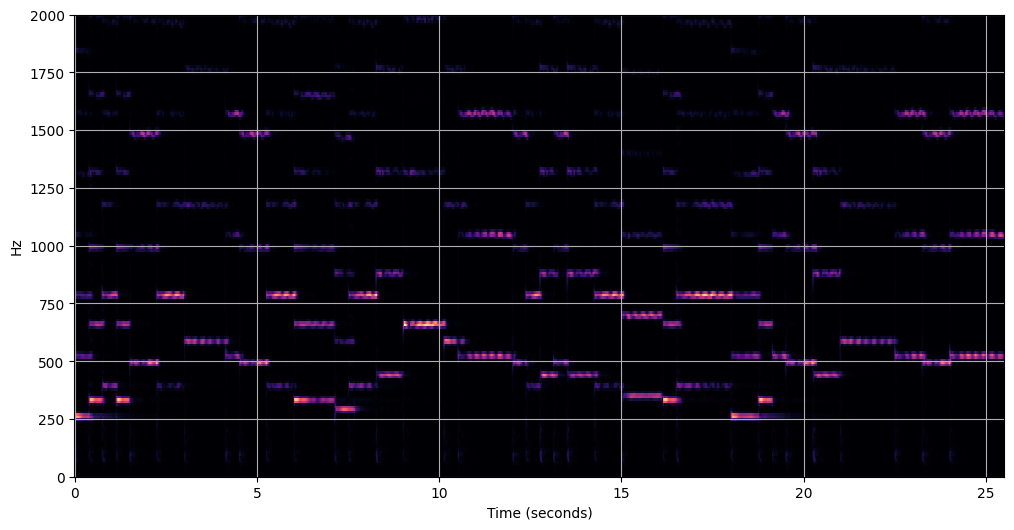

In [40]:
sum_inst = sum([piano*2, guitar, flute*1.2])
draw_stft(sum_inst, ylim=(0, 2000))

In [39]:
IPython.display.Audio(data=sum_inst, rate=sr)